# Лабораторная работа №6
Выполнила Карасева Екатерина M33351

## Свёрточная сеть

In [23]:
import tensorflow
from keras import models, Input
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.datasets import mnist, fashion_mnist
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [24]:
mnist_x_train = mnist_x_train.reshape(mnist_x_train.shape[0], mnist_x_train.shape[1], mnist_x_train.shape[2], 1)
mnist_x_test = mnist_x_test.reshape(mnist_x_test.shape[0], mnist_x_test.shape[1], mnist_x_test.shape[2], 1)

mnist_y_train = to_categorical(mnist_y_train)
mnist_y_test = to_categorical(mnist_y_test)

In [25]:
model_lenet5 = models.Sequential()
model_lenet5.add(Input(shape=(mnist_x_train.shape[1], mnist_x_train.shape[2], 1)))
model_lenet5.add(Conv2D(filters=6, kernel_size=(1, 1), activation='relu'))
model_lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_lenet5.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_lenet5.add(Flatten())
model_lenet5.add(Dense(120, activation='relu'))
model_lenet5.add(Dense(84, activation='relu'))
model_lenet5.add(Dense(10, activation='softmax'))
model_lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
mist_lenet5 = model_lenet5.fit(mnist_x_train, mnist_y_train, epochs=3, validation_data=(mnist_x_test, mnist_y_test))
model_lenet5.summary()

Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6050 - accuracy: 0.9096 - val_loss: 0.1485 - val_accuracy: 0.9557

In [41]:
model_2 = models.Sequential()
model_2.add(Input(shape=(mnist_x_train.shape[1], mnist_x_train.shape[2], 1)))
model_2.add(Conv2D(filters=6, kernel_size=(1, 1), activation='relu'))
model_2.add(Conv2D(filters=16, kernel_size=(1, 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(6, 6), strides=(4, 4)))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
mist_2 = model_2.fit(mnist_x_train, mnist_y_train, epochs=3, validation_data=(mnist_x_test, mnist_y_test))
model_2.summary()

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 1.0575 - accuracy: 0.7351 - val_loss: 0.6293 - val_accuracy: 0.7945

In [29]:
model_3 = models.Sequential()
model_3.add(Input(shape=(mnist_x_train.shape[1], mnist_x_train.shape[2], 1)))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_3.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(120, activation='relu'))
model_3.add(Dense(84, activation='relu'))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
mist_3 = model_3.fit(mnist_x_train, mnist_y_train, epochs=3, validation_data=(mnist_x_test, mnist_y_test))
model_3.summary()

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8684 - accuracy: 0.8890 - val_loss: 0.2182 - val_accuracy: 0.9388

In [45]:
print(mist_lenet5.history['accuracy'])
print(mist_2.history['accuracy'])
print(mist_3.history['accuracy'])

[0.9095666408538818, 0.9621999859809875, 0.9698333144187927]
[0.7350999712944031, 0.7928166389465332, 0.8042666912078857]
[0.8889833092689514, 0.9488166570663452, 0.9603333473205566]


In [47]:
best_model = model_lenet5

(fmnist_x_train, fmnist_y_train), (fmnist_x_test, fmnist_y_test) = fashion_mnist.load_data()
fmnist_x_train = fmnist_x_train.reshape(fmnist_x_train.shape[0], fmnist_x_train.shape[1], fmnist_x_train.shape[2], 1)
fmnist_x_test = fmnist_x_test.reshape(fmnist_x_test.shape[0], fmnist_x_test.shape[1], fmnist_x_test.shape[2], 1)

fmnist_test_class = fmnist_y_test

fmnist_y_train = to_categorical(fmnist_y_train)
fmnist_y_test = to_categorical(fmnist_y_test)


4422102/4422102 [==============================] - 1s 0us/step


In [48]:
fmist_2 = best_model.fit(fmnist_x_train, fmnist_y_train, epochs=3, validation_data=(fmnist_x_test, fmnist_y_test))

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5549 - accuracy: 0.7973 - val_loss: 0.5145 - val_accuracy: 0.8173

In [49]:
print(fmist_2.history['accuracy'])

[0.7972999811172485, 0.8410833477973938, 0.857200026512146]


In [50]:
predictions = model_2.predict(fmnist_x_test)
confusion_matrix(fmnist_test_class, list(map(np.argmax, predictions)))

313/313 [==============================] - 2s 5ms/step

array([[215,   0, 101,  29,  58, 335,  77,   4, 180,   1],
       [ 25,   5,  22, 393,   0, 100,   9,   0, 446,   0],
       [824,   0,  65,  36,  24,  41,   8,   0,   1,   1],
       [202,  14, 102, 136,  24, 246,  50,   0, 226,   0],
       [762,   0, 107,   8,  23,  80,   8,   0,  11,   1],
       [130,   4, 553,   1,  25, 180,  42,  46,   1,  18],
       [620,   0, 108,  17,  25, 133,  46,   1,  50,   0],
       [125,   0, 392,   5,  50, 323,  13,  67,   0,  25],
       [583,   3, 226,  51,  11,  21,  62,  31,   0,  12],
       [ 24,   6, 635,  10,   4, 316,   2,   1,   0,   2]], dtype=int64)

In [51]:
index_max_similar = [[-1 for _ in range(10)] for _ in range(10)]

for i in range(len(fmnist_x_test)):
    cur_class = fmnist_test_class[i]
    cur_i = index_max_similar[cur_class]
    for j in range(10):
        if cur_i[j] == -1 or predictions[i][j] > predictions[cur_i[j]][j]:
            index_max_similar[cur_class][j] = i
            cur_i = index_max_similar[cur_class]

index_max_similar

[[6485, 5907, 4818, 7602, 3466, 2450, 235, 3441, 1451, 531],
 [3826, 8679, 8064, 9316, 4581, 8908, 3974, 6331, 7224, 4581],
 [9755, 7452, 4847, 222, 9531, 8669, 6826, 9779, 3880, 530],
 [2824, 7337, 694, 4555, 7769, 8195, 4394, 1489, 6651, 5295],
 [5849, 3568, 9366, 3229, 4095, 3699, 25, 6103, 6420, 6131],
 [6147, 1110, 8830, 7795, 5423, 2413, 5728, 7367, 5584, 3219],
 [3128, 5987, 716, 5266, 5589, 5566, 2979, 1645, 147, 963],
 [9552, 4681, 5210, 4904, 7909, 3378, 5793, 8181, 6836, 9056],
 [5658, 1778, 5240, 4919, 9856, 4590, 9805, 1846, 2076, 3375],
 [7078, 1537, 2187, 6659, 8818, 2399, 5512, 5476, 3863, 7047]]

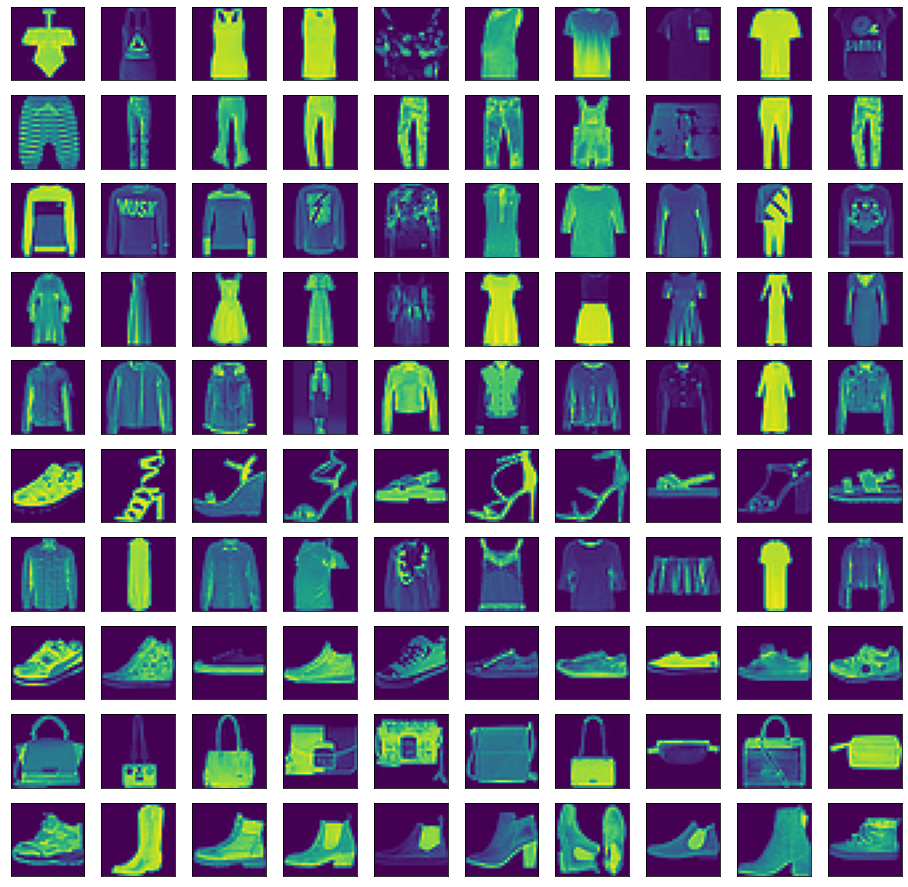

In [52]:
plt.figure(figsize=(16, 16))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(fmnist_x_test[index_max_similar[i // 10][i % 10]])

plt.show()